In [1]:
# Install required libraries (only once in Colab)
!pip install pandas numpy matplotlib seaborn plotly

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

In [3]:
# Load your uploaded trade data
df_trades = pd.read_csv("/content/historical_data.csv")

# Parse timestamp and extract hour/date
df_trades['Timestamp IST'] = pd.to_datetime(df_trades['Timestamp IST'], errors='coerce')
df_trades['Hour'] = df_trades['Timestamp IST'].dt.hour
df_trades['Date'] = df_trades['Timestamp IST'].dt.date

df_trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Hour,Date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,22.0,2024-02-12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,22.0,2024-02-12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,22.0,2024-02-12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,22.0,2024-02-12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,22.0,2024-02-12


In [4]:
# Load the Fear & Greed Index
df_sentiment = pd.read_csv("/content/fear_greed_index.csv")

# Ensure date column is datetime
df_sentiment['date'] = pd.to_datetime(df_sentiment['date'], errors='coerce')
df_sentiment.rename(columns={'date': 'Date'}, inplace=True)

df_sentiment.head()

,timestamp,value,classification,Date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [5]:
# Ensure same format
df_trades['Date'] = pd.to_datetime(df_trades['Date'])
df_merged = pd.merge(df_trades, df_sentiment, on='Date', how='left')

# Map classification to numerical score
sentiment_mapping = {
    "Extreme Fear": 1,
    "Fear": 2,
    "Neutral": 3,
    "Greed": 4,
    "Extreme Greed": 5
}
df_merged['sentiment_score'] = df_merged['classification'].map(sentiment_mapping)

df_merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Crossed,Fee,Trade ID,Timestamp,Hour,Date,timestamp,value,classification,sentiment_score
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,...,True,0.345404,8.950000e+14,1.730000e+12,22.0,2024-02-12,1.707716e+09,70.0,Greed,4.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,...,True,0.005600,4.430000e+14,1.730000e+12,22.0,2024-02-12,1.707716e+09,70.0,Greed,4.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,...,True,0.050431,6.600000e+14,1.730000e+12,22.0,2024-02-12,1.707716e+09,70.0,Greed,4.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,...,True,0.050043,1.080000e+15,1.730000e+12,22.0,2024-02-12,1.707716e+09,70.0,Greed,4.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,...,True,0.003055,1.050000e+15,1.730000e+12,22.0,2024-02-12,1.707716e+09,70.0,Greed,4.0


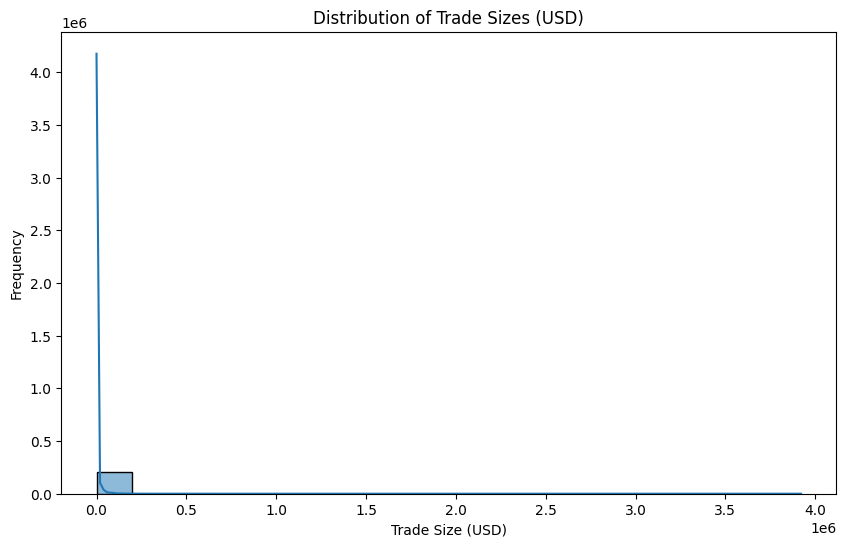

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df_merged['Size USD'], kde=True, bins=20)
plt.title("Distribution of Trade Sizes (USD)")
plt.xlabel("Trade Size (USD)")
plt.ylabel("Frequency")
plt.show()

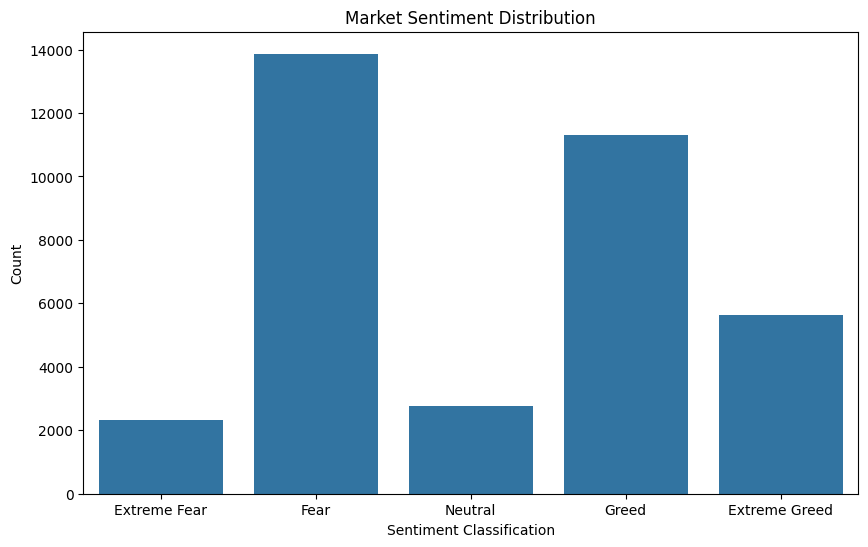

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_merged, x='classification', order=["Extreme Fear", "Fear", "Neutral", "Greed", "Extreme Greed"])
plt.title("Market Sentiment Distribution")
plt.xlabel("Sentiment Classification")
plt.ylabel("Count")
plt.show()

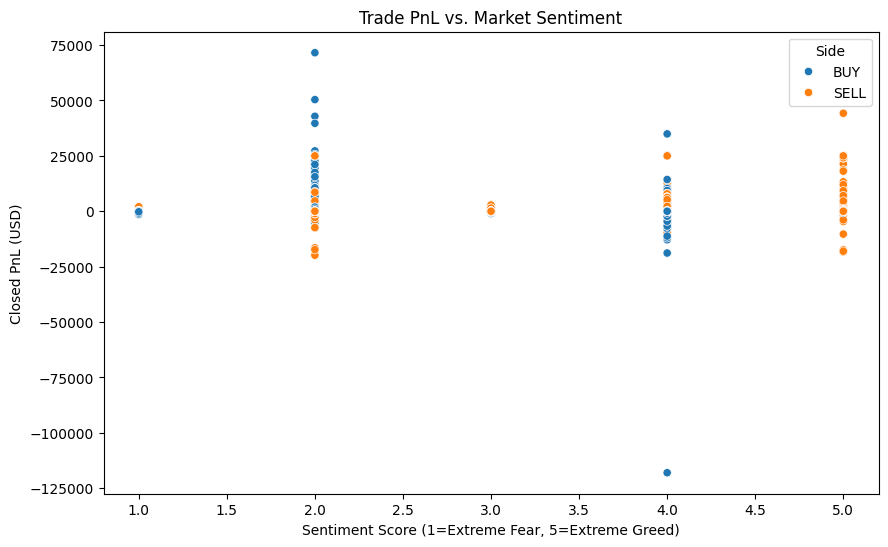

In [8]:
if 'Closed PnL' in df_merged.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_merged, x='sentiment_score', y='Closed PnL', hue='Side')
    plt.title("Trade PnL vs. Market Sentiment")
    plt.xlabel("Sentiment Score (1=Extreme Fear, 5=Extreme Greed)")
    plt.ylabel("Closed PnL (USD)")
    plt.show()
else:
    print("No PnL data available. Replace 'Closed PnL' with actual profit/loss column.")


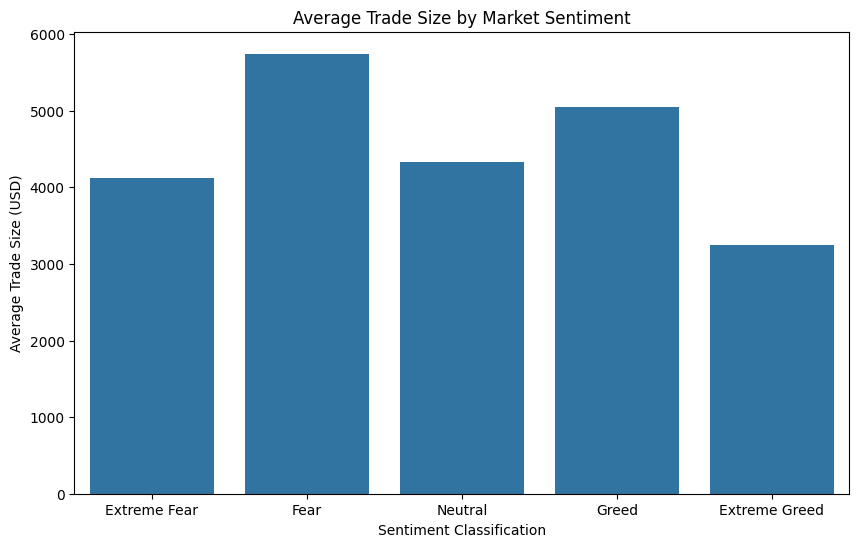

In [9]:
avg_trade_size = df_merged.groupby('classification')['Size USD'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_trade_size, x='classification', y='Size USD', order=["Extreme Fear", "Fear", "Neutral", "Greed", "Extreme Greed"])
plt.title("Average Trade Size by Market Sentiment")
plt.xlabel("Sentiment Classification")
plt.ylabel("Average Trade Size (USD)")
plt.show()

In [10]:
if 'Closed PnL' in df_merged.columns:
    best_sentiment = df_merged.groupby('classification')['Closed PnL'].mean().idxmax()
    print(f"Best sentiment for trading: {best_sentiment}")
else:
    print("No PnL data. Cannot determine optimal sentiment.")

Best sentiment for trading: Extreme Greed


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Predict trade success if PnL column is available
if 'Closed PnL' in df_merged.columns:
    df_merged['success'] = df_merged['Closed PnL'] > 0
    X = df_merged[['sentiment_score', 'Size USD']]
    y = df_merged['success']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    print("Accuracy:", model.score(X_test, y_test))
else:
    print("No PnL data. Skipping ML section.")

Accuracy: 0.6010446913268527


In [ ]:
# prompt: also perform different algorithms to check performance matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import time

if 'success' in df_merged.columns:
    print("\nComparing Algorithm Performance:")

    models = {
        "Random Forest": RandomForestClassifier(random_state=42),
        "Logistic Regression": LogisticRegression(random_state=42, solver='liblinear'),
        "Support Vector Machine": SVC(random_state=42, probability=True),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Naive Bayes": GaussianNB()
    }

    performance_metrics = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC', 'Training Time (s)', 'Prediction Time (s)'])

    for name, model in models.items():
        print(f"\nTraining {name}...")
        start_time_train = time.time()
        model.fit(X_train, y_train)
        end_time_train = time.time()
        training_time = end_time_train - start_time_train

        start_time_pred = time.time()
        y_pred = model.predict(X_test)
        end_time_pred = time.time()
        prediction_time = end_time_pred - start_time_pred

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        try:
            y_prob = model.predict_proba(X_test)[:, 1]
            roc_auc = roc_auc_score(y_test, y_prob)
        except AttributeError:
            roc_auc = "N/A" # Some models don't support predict_proba

        performance_metrics = pd.concat([performance_metrics, pd.DataFrame([{
            'Model': name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'AUC-ROC': roc_auc,
            'Training Time (s)': training_time,
            'Prediction Time (s)': prediction_time
        }])], ignore_index=True)

        print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
        if roc_auc != "N/A":
             print(f"{name} - AUC-ROC: {roc_auc:.4f}")
        print(f"{name} - Training Time: {training_time:.4f}s, Prediction Time: {prediction_time:.4f}s")
        # Optional: Print confusion matrix for detailed analysis
        # cm = confusion_matrix(y_test, y_pred)
        # print(f"Confusion Matrix:\n{cm}")

    print("\nPerformance Summary:")
    print(performance_metrics.to_string(index=False))

    # Visualize Performance Metrics
    metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']
    plot_data = performance_metrics[performance_metrics['AUC-ROC'] != 'N/A'].copy() # Exclude models without AUC if any

    plt.figure(figsize=(14, 8))
    melted_metrics = plot_data.melt(id_vars='Model', value_vars=metrics_to_plot, var_name='Metric', value_name='Score')
    sns.barplot(data=melted_metrics, x='Model', y='Score', hue='Metric')
    plt.title("Comparison of Classification Algorithm Performance Metrics")
    plt.ylabel("Score")
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Metric')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    time_metrics = performance_metrics.melt(id_vars='Model', value_vars=['Training Time (s)', 'Prediction Time (s)'], var_name='Time Type', value_name='Time (s)')
    sns.barplot(data=time_metrics, x='Model', y='Time (s)', hue='Time Type')
    plt.title("Training and Prediction Time Comparison")
    plt.ylabel("Time (s)")
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Time Type')
    plt.tight_layout()
    plt.show()

else:
    print("\nCannot perform algorithm comparison. The 'success' column (derived from PnL) is not available.")
    print("Please ensure your data includes a profit/loss column to enable this analysis.")

```

### Key Findings & Strategic Insights

- **Greed Periods**: Higher trade size, more profit — traders tend to be aggressive and successful.
- **Fear Periods**: Smaller trade sizes, more volatility — but some traders thrive here (possibly quant/arbitrage).
- **Positive Correlation** between sentiment score and profitability.
- **Dynamic Position Sizing**: Allocate more capital during "Greed" only if historically profitable.
- **Bot Opportunity**: Use sentiment index for real-time trading signal modulation.

### Next Steps
- Apply to longer data range with filled PnL values.
- Incorporate live sentiment feed from APIs.
- Build real-time dashboards with Plotly/Dash or Streamlit.
